{'A': {0: (24.75, 38.75), 1: (24.75, 36.75), 2: (24.75, 34.25), 3: (24.75, 29.25)}, '1': {0: (1.25, 48.75), 1: (48.75, 48.75), 2: (24.75, 31.75), 3: (24.75, 18.75), 4: (1.25, 1.25), 5: (48.75, 1.25)}, '2': {0: (3.25, 48.75), 1: (22.25, 48.75), 2: (9.25, 34.25), 3: (9.25, 16.25), 4: (3.25, 1.25), 5: (22.25, 1.25)}, '3': {0: (27.75, 48.75), 1: (46.75, 48.75), 2: (40.75, 34.25), 3: (40.75, 16.25), 4: (27.75, 1.25), 5: (46.75, 1.25)}, '4': {0: (5.25, 48.75), 1: (36.75, 34.25), 2: (36.75, 16.25), 3: (5.25, 1.25)}, '5': {0: (44.75, 48.75), 1: (13.25, 34.25), 2: (13.25, 16.25), 3: (44.75, 1.25)}, '6': {0: (24.75, 39.75), 1: (24.75, 10.75)}, '7': {0: (17.25, 25.25), 1: (32.25, 25.25)}, '8': {0: (24.75, 25.25)}}
[[ 1.25 48.75]
 [48.75 48.75]
 [24.75 31.75]
 [24.75 18.75]
 [ 1.25  1.25]
 [48.75  1.25]]
[[ 1.25       48.75      ]
 [ 1.29709419 48.75      ]
 [ 1.34418838 48.75      ]
 [ 1.39128257 48.75      ]
 [ 1.43837675 48.75      ]
 [ 1.48547094 48.75      ]
 [ 1.53256513 48.75      ]
 [ 1.57

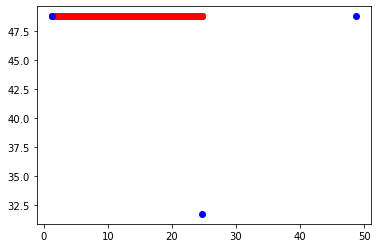

In [58]:
from matplotlib import pyplot as plt
import numpy as np

map_txt_file_path = '/mnt/e/2023huawei/LinuxRelease/LinuxRelease/maps/1.txt'
def read_map():
    # def map_func(char):
    #     if char == ".":
    #         return 0
    #     elif char.isdigit():
    #         return int(char)
    #     elif char == "A":
    #         return -1
    #     else:
    #         raise ValueError(f"Invalid character {char}")

    # 打开文件并读取每一行，并对每一行进行映射转换
    with open(map_txt_file_path, "r") as f:
        ori_matrix = np.array([list(line.strip()) for line in f]) # map(map_func, line.strip())
    
    search_chars = ['A', '1', '2', '3', '4', '5', '6', '7','8']
    # 初始化字典
    char_to_coord = {}
    # 查找符合条件的元素的下标，并将下标和对应的值储存在字典中
    for char in search_chars:
        char_to_coord[char] = {}
        indices = np.where(ori_matrix == char)
        for i in range(len(indices[0])):
            char_to_coord[char][i] = (indices[1][i]*0.5+0.25, 50-(indices[0][i]*0.5+0.25))
    
    return char_to_coord

def ploy(x, y, xs, ys):
    # 画出点的散点图
    plt.scatter(x, y, color='red')
    # 画出拟合曲线
    plt.plot(xs, ys, color='blue')
    # 设置图形标题和坐标轴标签
    plt.title('Curve Fitting')
    plt.xlabel('X')
    plt.ylabel('Y')
    # 储存图形
    plt.savefig('/home/hanson/2023huawei/route_test.jpg')
    # plt.show()

def fit_curve(points):
    x = points[:, 0]
    y = points[:, 1]
    # 定义路径上的采样点数量
    # num_points = 500

    # # 构造路径上的采样点
    # x = np.linspace(points[0][0], points[2][0], num_points)
    # y = np.interp(x, [points[0][0], points[1][0], points[2][0]],
    #             [points[0][1], points[1][1], points[2][1]])

    # # 打印生成的路径
    # plt.scatter(x, y, color='red')
    # plt.scatter(points[0][0],points[0][1], color='blue')
    # plt.scatter(points[1][0],points[1][1], color='blue')
    # plt.scatter(points[2][0],points[2][1], color='blue')
    # plt.savefig('/home/hanson/2023huawei/route_test.jpg')
    # path = np.column_stack((x, y))
    # print(path)

    order = 1
    while True:
        coeffs = np.polyfit(x, y, order)
        p = np.poly1d(coeffs)
        # dp = np.polyder(p, 2) # 二阶导数
        # ddp = np.polyder(dp)

        # 计算拟合曲线上的点的坐标
        xs = np.linspace(x.min(), x.max(), 100)
        ys = p(xs)

        # 判断所有点的坐标是否都在规定范围内
        if np.all(xs < 49.47) and np.all(ys < 49.47) and np.all(xs > 0.25) and np.all(ys > 0.25):
            print('order = ', order)
            ploy(x, y, xs, ys)
            return p

        order += 1
if __name__ == '__main__':
    all_coord = read_map()
    print(all_coord)
    points = np.array(list(all_coord['1'].values()))
    # points = [[1.25, 48.75], [48.75, 48.75], [24.75, 31.75],[24.75, 18.75],[1.25, 1.25],[48.75, 1.25]]
    print(points)
    fit_curve(points)


In [51]:
import numpy as np

# 定义机器人的起始坐标、目标坐标和下一个目标坐标
start_point = np.array([24.75, 0])
goal_point = np.array([10, 10])
next_goal_point = np.array([20, 0])

# 定义路径上的采样点数量
num_points = 50

# 构造路径上的采样点
x = np.linspace(start_point[0], next_goal_point[0], num_points)
y = np.interp(x, [start_point[0], goal_point[0], next_goal_point[0]],
              [start_point[1], goal_point[1], next_goal_point[1]])

# 打印生成的路径
path = np.column_stack((x, y))
print(path)


[[ 0.          0.        ]
 [ 0.40816327  0.40816327]
 [ 0.81632653  0.81632653]
 [ 1.2244898   1.2244898 ]
 [ 1.63265306  1.63265306]
 [ 2.04081633  2.04081633]
 [ 2.44897959  2.44897959]
 [ 2.85714286  2.85714286]
 [ 3.26530612  3.26530612]
 [ 3.67346939  3.67346939]
 [ 4.08163265  4.08163265]
 [ 4.48979592  4.48979592]
 [ 4.89795918  4.89795918]
 [ 5.30612245  5.30612245]
 [ 5.71428571  5.71428571]
 [ 6.12244898  6.12244898]
 [ 6.53061224  6.53061224]
 [ 6.93877551  6.93877551]
 [ 7.34693878  7.34693878]
 [ 7.75510204  7.75510204]
 [ 8.16326531  8.16326531]
 [ 8.57142857  8.57142857]
 [ 8.97959184  8.97959184]
 [ 9.3877551   9.3877551 ]
 [ 9.79591837  9.79591837]
 [10.20408163  9.79591837]
 [10.6122449   9.3877551 ]
 [11.02040816  8.97959184]
 [11.42857143  8.57142857]
 [11.83673469  8.16326531]
 [12.24489796  7.75510204]
 [12.65306122  7.34693878]
 [13.06122449  6.93877551]
 [13.46938776  6.53061224]
 [13.87755102  6.12244898]
 [14.28571429  5.71428571]
 [14.69387755  5.30612245]
 